<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_code_kata/blob/master/kaggle_airbnb_ny_dataprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cp -r /content/drive/MyDrive/kaggle/airbnb_ny/ /content

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('airbnb_ny/AB_NYC_2019.csv')

room_type_dummies=pd.get_dummies(df['room_type'],prefix='room_type')
df['reviews_per_month']=df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

df=df.drop(['id','name','host_id','host_name','room_type','last_review','neighbourhood_group','neighbourhood'],axis=1)

df=pd.concat([df,room_type_dummies],axis=1)

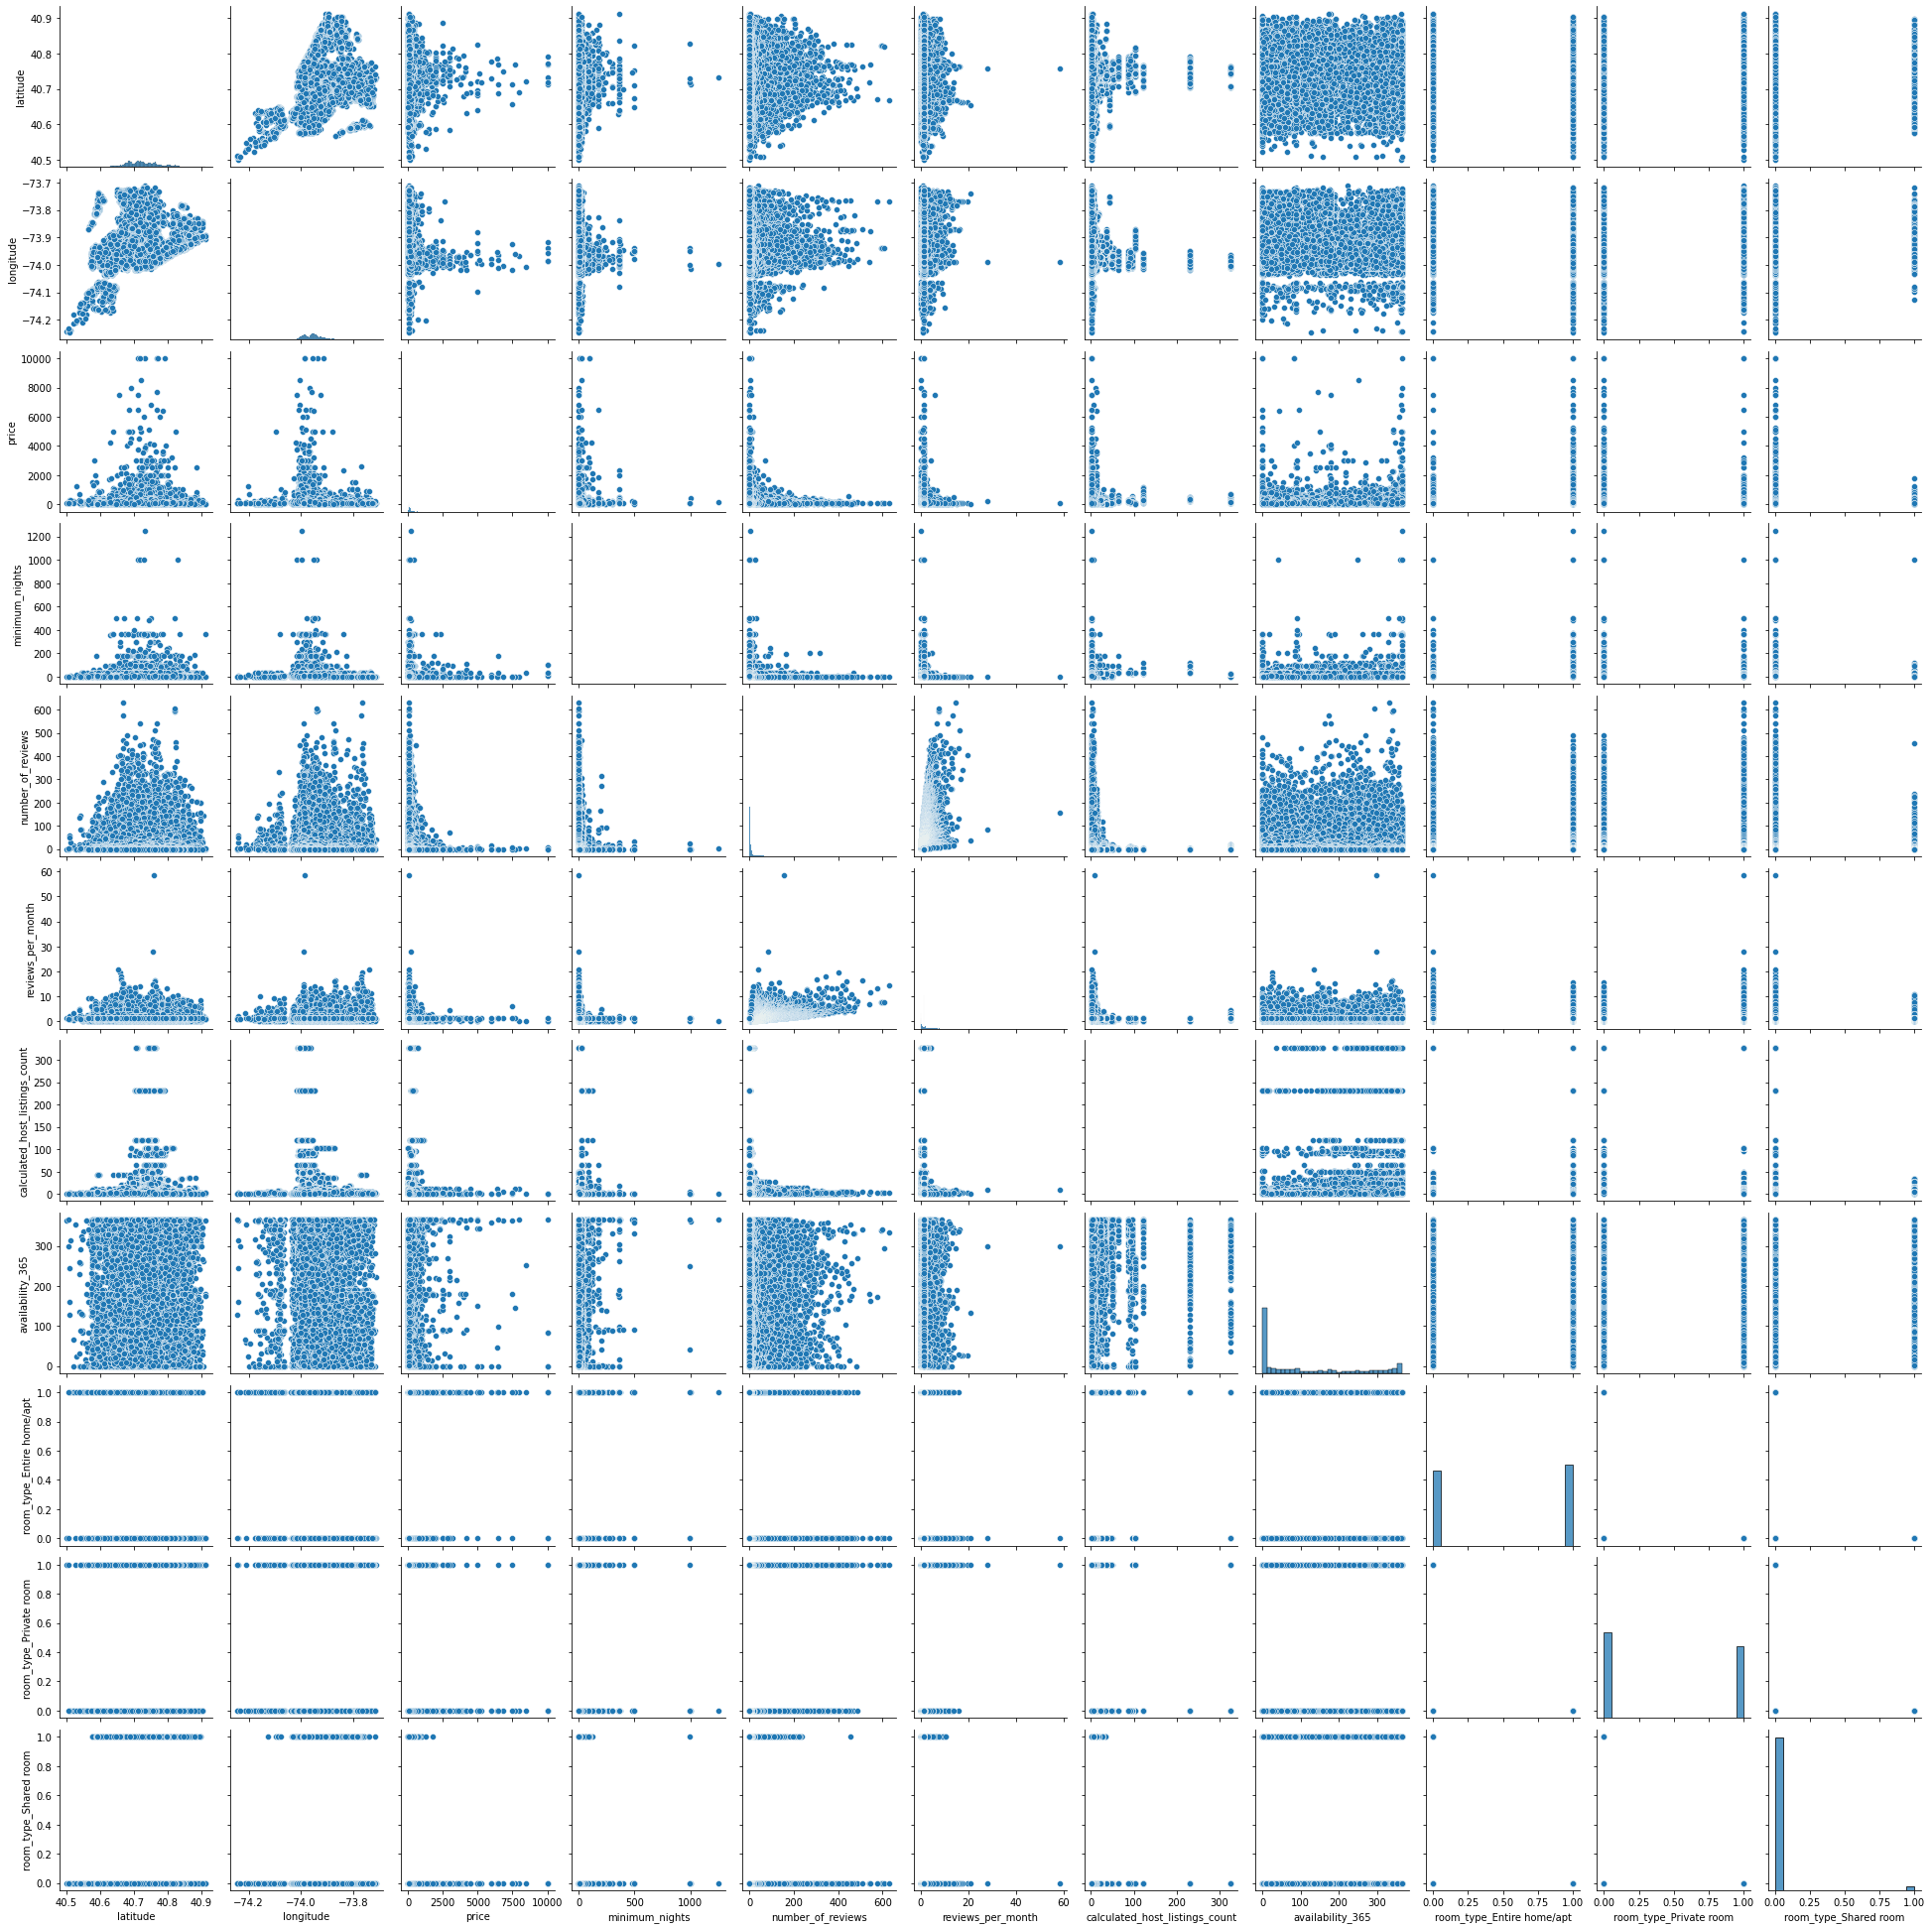

In [28]:
sns.pairplot(df)

In [14]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.210000,6,365,0,1,0
1,40.75362,-73.98377,225,1,45,0.380000,2,355,1,0,0
2,40.80902,-73.94190,150,3,0,1.373221,1,365,0,1,0
3,40.68514,-73.95976,89,1,270,4.640000,1,194,1,0,0
4,40.79851,-73.94399,80,10,9,0.100000,1,0,1,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               48895 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
 8   room_type_Entire home/apt       48895 non-null  uint8  
 9   room_type_Private room          48895 non-null  uint8  
 10  room_type_Shared room           48895 non-null  uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 3.1 MB


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
X=df.drop(['price'],axis=1)
y=df['price']

X_train,X_test,y_train,y_test=train_test_split(X,y)

scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model=LinearRegression()
model.fit(scaled_X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.score(scaled_X_test,y_test)

0.08922403809182256